# QuTiP example: Calculate the quasi-steadystate of a time-dependent (period) quantum system

J.R. Johansson and P.D. Nation

For more information about QuTiP see [http://qutip.org](http://qutip.org)

Find the steady state of a driven qubit, by finding the eigenstates of the propagator for one driving period

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
from qutip import *

In [5]:
def hamiltonian_t(t, args):
    #
    # evaluate the hamiltonian at time t. 
    #
    H0 = args['H0']
    H1 = args['H1']
    w  = args['w']

    return H0 + H1 * np.sin(w * t)

In [6]:
def sd_qubit_integrate(delta, eps0, A, w, gamma1, gamma2, psi0, tlist):

    # Hamiltonian
    sx = sigmax()
    sz = sigmaz()
    sm = destroy(2)

    H0 = - delta/2.0 * sx - eps0/2.0 * sz
    H1 = - A * sx
        
    H_args = {'H0': H0, 'H1': H1, 'w': w}
    # collapse operators
    c_op_list = []

    n_th = 0.5 # zero temperature

    # relaxation
    rate = gamma1 * (1 + n_th)
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * sm)

    # excitation
    rate = gamma1 * n_th
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * sm.dag())

    # dephasing 
    rate = gamma2
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * sz)


    # evolve and calculate expectation values
    output = mesolve(hamiltonian_t, psi0, tlist, c_op_list, [sm.dag() * sm], H_args)  

    T = 2 * np.pi / w

    U = propagator(hamiltonian_t, T, c_op_list, H_args)

    rho_ss = propagator_steadystate(U)

    return output.expect[0], expect(sm.dag() * sm, rho_ss) * np.ones(shape(tlist))

In [7]:
delta = 0.3  * 2 * np.pi   # qubit sigma_x coefficient
eps0  = 1.0  * 2 * np.pi   # qubit sigma_z coefficient
A     = 0.05 * 2 * np.pi   # driving amplitude (sigma_x coupled)
w     = 1.0  * 2 * np.pi   # driving frequency

gamma1 = 0.15           # relaxation rate
gamma2 = 0.05           # dephasing  rate

# intial state
psi0 = basis(2,0)
tlist = np.linspace(0,50,500)

In [8]:
p_ex, p_ex_ss = sd_qubit_integrate(delta, eps0, A, w, gamma1, gamma2, psi0, tlist)

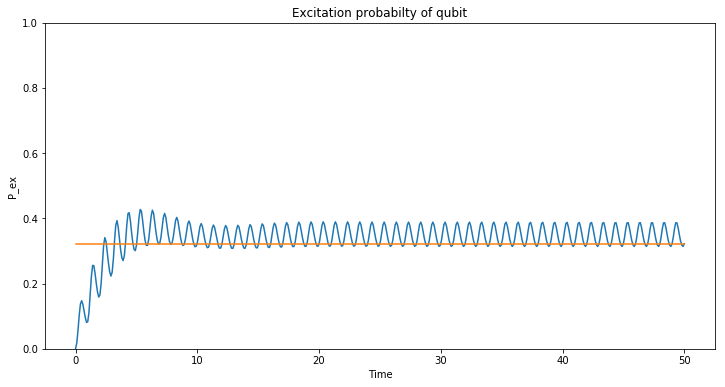

In [9]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(tlist, np.real(p_ex))
ax.plot(tlist, np.real(p_ex_ss))
ax.set_xlabel('Time')
ax.set_ylabel('P_ex')
ax.set_ylim(0,1)
ax.set_title('Excitation probabilty of qubit');

## Software version:

In [10]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.3.0.dev0+6e5b1d43
Numpy,1.13.1
SciPy,0.19.1
matplotlib,2.0.2
Cython,0.25.2
Number of CPUs,2
BLAS Info,INTEL MKL
IPython,6.1.0
Python,"3.6.2 |Anaconda custom (x86_64)| (default, Jul 20 2017, 13:14:59) [GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]"
OS,posix [darwin]
